In [37]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

In [33]:
result_dishes = pd.read_csv(r'results/Report_dishes.csv')
result_cd = pd.read_csv(r'results/Report_cd.csv')
result_kmns = pd.read_csv(r'results/Report_kmns.csv')

print('DISHES:')
print(result_dishes)

print('CD Fusion:')
print(result_cd)

print('Kmns:')
print(result_kmns)

DISHES:
    Case  Timecost  S_mean  S_std       NMI  Perfect_recover  RMSE_beta  \
0      1  0.093120    3.00    0.0  0.981450             0.96  10.813624   
1      2  0.309176    3.00    0.0  0.996190             0.99  10.921006   
2      3  0.504119    3.00    0.0  0.991641             0.98  11.102408   
3      4  0.862990    3.00    0.0  0.997489             0.99  10.800142   
4      5  1.312059    3.00    0.0  0.997229             0.99  10.773971   
5      6  1.863109    3.00    0.0  0.992074             0.97  10.547695   
6      7  0.092333    5.00    0.0  1.000000             1.00  11.017868   
7      8  0.105933    7.00    0.0  1.000000             1.00  10.756419   
8      9  0.120082    9.00    0.0  1.000000             1.00  10.726386   
9     10  0.131468    3.00    0.0  1.000000             1.00  22.582302   
10    11  0.225963    3.00    0.0  1.000000             1.00  33.803331   
11    12  0.305489    3.00    0.0  1.000000             1.00  45.495053   
12    13  0.39417

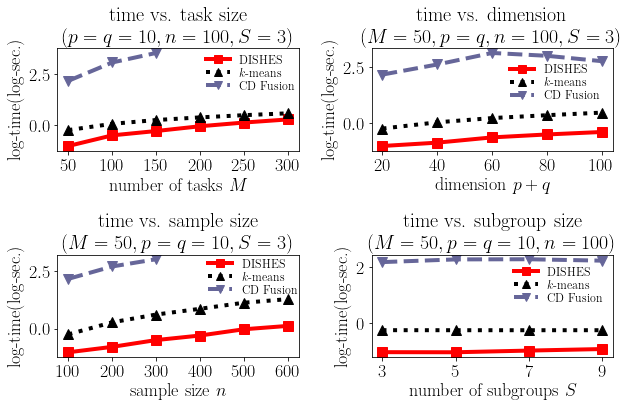

In [34]:
fig = plt.figure(figsize=(9,6))
EE_color = 'r'
kmns_color = 'k'
mtl_color = [0.4,0.4,0.6]
mark_size = 10
line_width = 4
legend_fontsize = 12
legend_markerscale = 0.8
################################################################################################

################################### time vs M ####################################
ax = fig.add_subplot(221)
M = [50, 100, 150, 200, 250, 300]
ax.set_xticks(M)
ax.set_xlabel(r'number of tasks $M$')
ax.set_ylabel('log-time(log-sec.)')
ax.set_title('time vs. task size\n($p=q=10,n=100,S=3$)', horizontalalignment='center', fontsize=20)

ax.plot(M, np.log10(result_dishes['Timecost'][:6]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')

ax.plot(M, np.log10(result_kmns['Timecost'][:6]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')

ax.plot(M[:3], np.log10(result_cd['Timecost'][:3]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

ax.legend(loc='upper right', frameon=False,fontsize=legend_fontsize,labelspacing=0,markerscale=legend_markerscale,borderaxespad=0)

#################################### time vs p+q ###################################

ax = fig.add_subplot(222)
p = [20, 40, 60, 80, 100]
ax.set_xticks(p)
ax.set_xlabel(r'dimension $p+q$')
ax.set_ylabel('log-time(log-sec.)')
ax.set_title('time vs. dimension\n($M=50,p=q,n=100,S=3$)', horizontalalignment='center', fontsize=20)

ax.plot(p, np.log10(result_dishes['Timecost'][[0,9,10,11,12]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')

ax.plot(p, np.log10(result_kmns['Timecost'][[0,9,10,11,12]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')

ax.plot(p, np.log10(result_cd['Timecost'][[0,9,10,11,12]]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

ax.legend(loc='upper right', frameon=False,fontsize=legend_fontsize,labelspacing=0,borderaxespad=0.8,markerscale=legend_markerscale)

################################### time vs n ####################################
ax = fig.add_subplot(223)
n = [100, 200, 300, 400, 500, 600]
ax.set_xticks(n)
ax.set_xlabel(r'sample size $n$')
ax.set_ylabel('log-time(log-sec.)')
ax.set_title('time vs. sample size\n($M=50,p=q=10,S=3$)', horizontalalignment='center', fontsize=20)

ax.plot(n, np.log10(result_dishes['Timecost'][[0, 13,14,15,16,17]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')

ax.plot(n, np.log10(result_kmns['Timecost'][[0, 13,14,15,16,17]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')

ax.plot(n[:3], np.log10(result_cd['Timecost'][[0,13,14]]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

ax.legend(loc='upper right', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=-0.2,markerscale=legend_markerscale)

################################### time vs S ####################################
ax = fig.add_subplot(224)
S = [3,5,7,9]
ax.set_xticks(S)
ax.set_xlabel(r'number of subgroups $S$')
ax.set_ylabel('log-time(log-sec.)')
ax.set_title('time vs. subgroup size\n($M=50,p=q=10,n=100$)', horizontalalignment='center', fontsize=20)

ax.plot(S, np.log10(result_dishes['Timecost'][[0,6,7,8]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')

ax.plot(S, np.log10(result_kmns['Timecost'][[0,6,7,8]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')

ax.plot(S, np.log10(result_cd['Timecost'][[0,6,7,8]]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

ax.legend(loc='upper right', frameon=False,fontsize=legend_fontsize,labelspacing=0,markerscale=legend_markerscale)

################################################################################################

plt.tight_layout()
plt.savefig('time.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

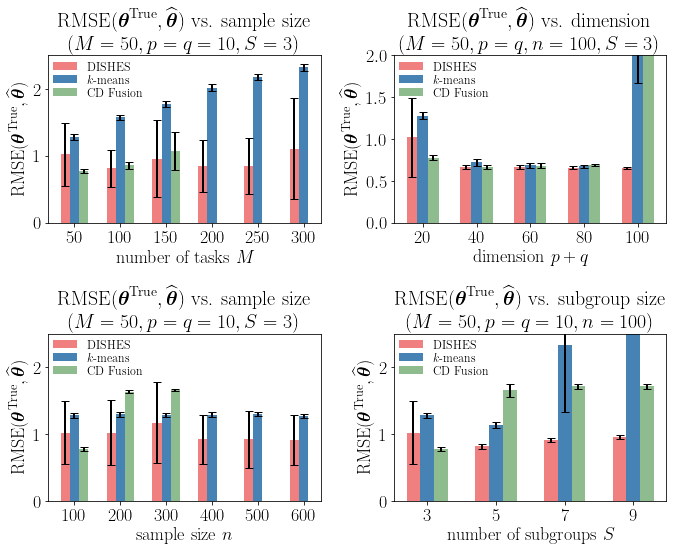

In [35]:
fig = plt.figure(figsize=(10,8))
EE_color = 'lightcoral'
kmns_color = 'steelblue'
mtl_color = 'darkseagreen'
mark_size = 10
line_width = 4
legend_fontsize = 12
legend_markerscale = 0.8
bar_width = 10
err_paras = dict(elinewidth=2, capsize=4)

################################### RMSE vs M ####################################
ax = fig.add_subplot(221)
M = np.array([50, 100, 150, 200, 250, 300])
ax.set_xticks(M)
ax.set_xlabel(r'number of tasks $M$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. sample size\n($M=50,p=q=10,S=3$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,2.5])

ax.bar(M-bar_width, result_dishes['RMSE_theta'][:6], width=bar_width, color=EE_color, error_kw=err_paras, yerr=result_dishes['RMSE_theta_std'][:6]/3, label=r'DISHES')
ax.bar(M, result_kmns['RMSE_theta'][:6], width=bar_width, color=kmns_color, error_kw=err_paras, yerr=result_kmns['RMSE_theta_std'][:6]/3, label=r'$k$-means')
ax.bar(M+bar_width, result_cd['RMSE_theta'][:6], width=bar_width, color=mtl_color, error_kw=err_paras, yerr=result_cd['RMSE_theta_std'][:6]/3, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0,markerscale=legend_markerscale)

################################### RMSE vs p+q ####################################

ax = fig.add_subplot(222)
p = np.array([20, 40, 60, 80, 100])
ax.set_xticks(p)
ax.set_xlabel(r'dimension $p+q$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. dimension\n($M=50,p=q,n=100,S=3$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,2])

ax.bar(p-bar_width/2.5, result_dishes['RMSE_theta'][[0,9,10,11,12]], width=bar_width/2.5, color=EE_color, error_kw=err_paras, yerr=result_dishes['RMSE_theta_std'][[0,9,10,11,12]]/3, label=r'DISHES')
ax.bar(p, result_kmns['RMSE_theta'][[0,9,10,11,12]], width=bar_width/2.5, color=kmns_color, error_kw=err_paras, yerr=result_kmns['RMSE_theta_std'][[0,9,10,11,12]]/3, label=r'$k$-means')
ax.bar(p+bar_width/2.5, result_cd['RMSE_theta'][[0,9,10,11,12]], width=bar_width/2.5, color=mtl_color, error_kw=err_paras, yerr=result_cd['RMSE_theta_std'][[0,9,10,11,12]]/3, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0,markerscale=legend_markerscale)


################################### RMSE vs n ####################################
ax = fig.add_subplot(223)
n = np.array([100, 200, 300, 400, 500, 600])
ax.set_xticks(n)
ax.set_xlabel(r'sample size $n$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. sample size\n($M=50,p=q=10,S=3$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,2.5])

ax.bar(n-bar_width*2, result_dishes['RMSE_theta'][[0, 13,14,15,16,17]], width=bar_width*2, color=EE_color, error_kw=err_paras, yerr=result_dishes['RMSE_theta_std'][[0, 13,14,15,16,17]]/3, label=r'DISHES')
ax.bar(n, result_kmns['RMSE_theta'][[0, 13,14,15,16,17]], width=bar_width*2, color=kmns_color, error_kw=err_paras, yerr=result_kmns['RMSE_theta_std'][[0, 13,14,15,16,17]]/3, label=r'$k$-means')
ax.bar(n+bar_width*2, result_cd['RMSE_theta'][[0, 13,14,15,16,17]], width=bar_width*2, color=mtl_color, error_kw=err_paras, yerr=result_cd['RMSE_theta_std'][[0, 13,14,15,16,17]]/3, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0,markerscale=legend_markerscale)

################################### RMSE vs S ####################################
ax = fig.add_subplot(224)
S = np.array([3,5,7,9])
ax.set_xticks(S)
ax.set_xlabel(r'number of subgroups $S$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. subgroup size\n($M=50,p=q=10,n=100$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,2.5])

ax.bar(S-bar_width/25, result_dishes['RMSE_theta'][[0,6,7,8]], width=bar_width/25, color=EE_color, error_kw=err_paras, yerr=result_dishes['RMSE_theta_std'][[0,6,7,8]]/3, label=r'DISHES')
ax.bar(S, result_kmns['RMSE_theta'][[0,6,7,8]], width=bar_width/25, color=kmns_color, error_kw=err_paras, yerr=result_kmns['RMSE_theta_std'][[0,6,7,8]]/3, label=r'$k$-means')
ax.bar(S+bar_width/25, result_cd['RMSE_theta'][[0,6,7,8]], width=bar_width/25, color=mtl_color, error_kw=err_paras, yerr=result_cd['RMSE_theta_std'][[0,6,7,8]]/3, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0,markerscale=legend_markerscale)


plt.tight_layout()
plt.savefig('RMSE_theta.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

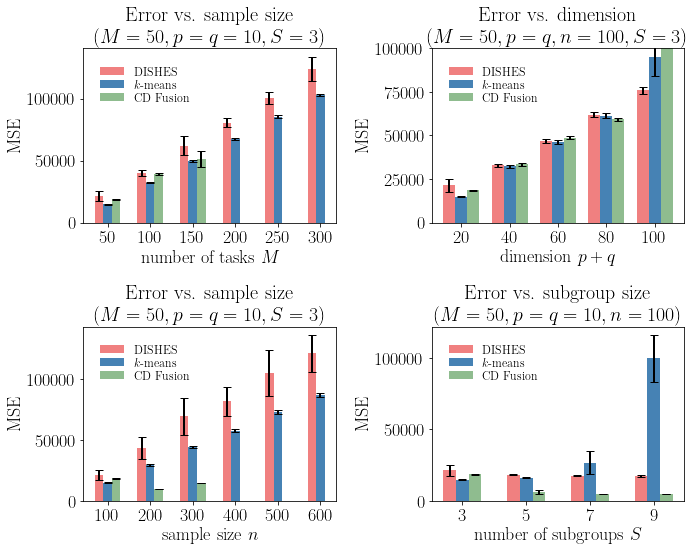

In [36]:
fig = plt.figure(figsize=(10, 8))
EE_color = 'lightcoral'
kmns_color = 'steelblue'
mtl_color = 'darkseagreen'
mark_size = 10
line_width = 4
legend_fontsize = 12
legend_markerscale = 0.8
bar_width = 10
err_paras = dict(elinewidth=2, capsize=4)

################################### Error vs M ####################################
ax = fig.add_subplot(221)
M = np.array([50, 100, 150, 200, 250, 300])
ax.set_xticks(M)
ax.set_xlabel(r'number of tasks $M$')
ax.set_ylabel('MSE')
ax.set_title('Error vs. sample size\n($M=50,p=q=10,S=3$)', horizontalalignment='center', fontsize=20)


ax.bar(M-bar_width, result_dishes['Error'][:6], width=bar_width, color=EE_color, error_kw=err_paras, yerr=result_dishes['Error_std'][:6]/3, label=r'DISHES')
ax.bar(M, result_kmns['Error'][:6], width=bar_width, color=kmns_color, error_kw=err_paras, yerr=result_kmns['Error_std'][:6]/3, label=r'$k$-means')
ax.bar(M+bar_width, result_cd['Error'][:6], width=bar_width, color=mtl_color, error_kw=err_paras, yerr=result_cd['Error_std'][:6]/3, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=1,markerscale=legend_markerscale)

################################### Error vs p+q ####################################

ax = fig.add_subplot(222)
p = np.array([20, 40, 60, 80, 100])
ax.set_xticks(p)
ax.set_xlabel(r'dimension $p+q$')
ax.set_ylabel('MSE')
ax.set_title('Error vs. dimension\n($M=50,p=q,n=100,S=3$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,1e5])

ax.bar(p-bar_width/2, result_dishes['Error'][[0,9,10,11,12]], width=bar_width/2, color=EE_color, error_kw=err_paras, yerr=result_dishes['Error_std'][[0,9,10,11,12]]/3, label=r'DISHES')
ax.bar(p, result_kmns['Error'][[0,9,10,11,12]], width=bar_width/2, color=kmns_color, error_kw=err_paras, yerr=result_kmns['Error_std'][[0,9,10,11,12]]/3, label=r'$k$-means')
ax.bar(p+bar_width/2, result_cd['Error'][[0,9,10,11,12]], width=bar_width/2, color=mtl_color, error_kw=err_paras, yerr=result_cd['Error_std'][[0,9,10,11,12]]/3, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=1,markerscale=legend_markerscale)


################################### Error vs n ####################################
ax = fig.add_subplot(223)
n = np.array([100, 200, 300, 400, 500, 600])
ax.set_xticks(n)
ax.set_xlabel(r'sample size $n$')
ax.set_ylabel('MSE')
ax.set_title('Error vs. sample size\n($M=50,p=q=10,S=3$)', horizontalalignment='center', fontsize=20)
#ax.set_ylim([0,2])

ax.bar(n-bar_width*2, result_dishes['Error'][[0, 13,14,15,16,17]], width=bar_width*2, color=EE_color, error_kw=err_paras, yerr=result_dishes['Error_std'][[0, 13,14,15,16,17]]/3, label=r'DISHES')
ax.bar(n, result_kmns['Error'][[0, 13,14,15,16,17]], width=bar_width*2, color=kmns_color, error_kw=err_paras, yerr=result_kmns['Error_std'][[0, 13,14,15,16,17]]/3, label=r'$k$-means')
ax.bar(n+bar_width*2, result_cd['Error'][[0, 13,14,15,16,17]], width=bar_width*2, color=mtl_color, error_kw=err_paras, yerr=result_cd['Error_std'][[0, 13,14,15,16,17]]/3, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=1,markerscale=legend_markerscale)

################################### Error vs S ####################################
ax = fig.add_subplot(224)
S = np.array([3,5,7,9])
ax.set_xticks(S)
ax.set_xlabel(r'number of subgroups $S$')
ax.set_ylabel('MSE')
ax.set_title('Error vs. subgroup size\n($M=50,p=q=10,n=100$)', horizontalalignment='center', fontsize=20)
#ax.set_ylim([0,2])

ax.bar(S-bar_width/25, result_dishes['Error'][[0,6,7,8]], width=bar_width/25, color=EE_color, error_kw=err_paras, yerr=result_dishes['Error_std'][[0,6,7,8]]/3, label=r'DISHES')
ax.bar(S, result_kmns['Error'][[0,6,7,8]], width=bar_width/25, color=kmns_color, error_kw=err_paras, yerr=result_kmns['Error_std'][[0,6,7,8]]/3, label=r'$k$-means')
ax.bar(S+bar_width/25, result_cd['Error'][[0,6,7,8]], width=bar_width/25, color=mtl_color, error_kw=err_paras, yerr=result_cd['Error_std'][[0,6,7,8]]/3, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=1,markerscale=legend_markerscale)

plt.tight_layout()
plt.savefig('Error.pdf',format='pdf',bbox_inches = 'tight')
plt.show()